Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.88      0.78        41
           1       0.90      0.75      0.81        59

    accuracy                           0.80       100
   macro avg       0.80      0.81      0.80       100
weighted avg       0.82      0.80      0.80       100

Confusion Matrix:
 [[36  5]
 [15 44]]


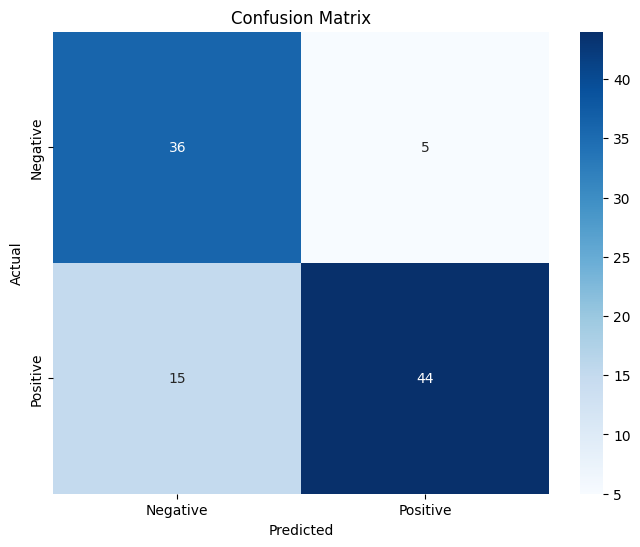

Text(0.5, 1.0, 'Sentiment Analysis Results')

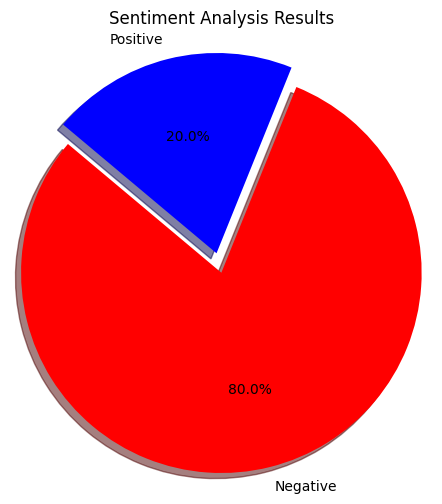

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load IMDb dataset from CSV file
imdb_data = pd.read_csv('/content/file3.csv')

# Split the dataset into features (X) and labels (y)
X = imdb_data['review'].values
y = imdb_data['sentiment'].map({'positive': 1, 'negative': 0}).values

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = svc_classifier.predict(X_test)

# Calculate Accuracy and Display Classification Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a pie chart
labels = ['Negative', 'Positive']
sizes = [conf_matrix[0, 0] + conf_matrix[1, 1], conf_matrix[0, 1] + conf_matrix[1, 0]]
colors = ['red', 'blue']
explode = (0.1, 0)  # Explode the first slice (Negative)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Analysis Results')


Data after preprocessing:
                                              review sentiment
0  2005 was one of the best year for movies. We h...  positive
1  According to John Ford's lyrically shot, ficti...  positive
2  Where to start... If this movie had been a dar...  negative
3  Oh dear god. This was horrible. There is bad, ...  negative
4  Yes, bad acting isn't only one thing to mentio...  negative

Data after labeling:
                                                Review  Sentiment
0    2005 was one of the best year for movies. We h...          1
1    According to John Ford's lyrically shot, ficti...          1
2    Where to start... If this movie had been a dar...          0
3    Oh dear god. This was horrible. There is bad, ...          0
4    Yes, bad acting isn't only one thing to mentio...          0
..                                                 ...        ...
494  I have seen so many bad reviews on Supervivien...          1
495  This film is really bad. It maybe harsh, 

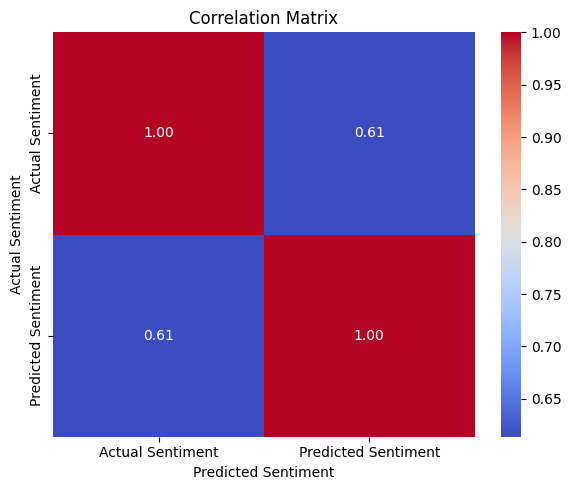

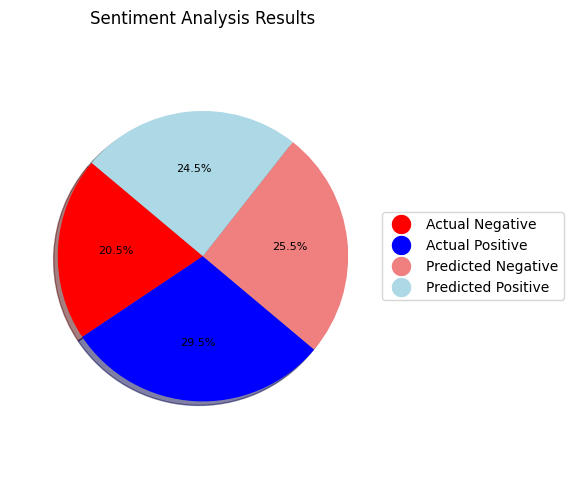

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load IMDb dataset from CSV file
imdb_data = pd.read_csv('/content/file3.csv')

# Check for and handle empty data (drop rows with missing values)
imdb_data.dropna(subset=['review', 'sentiment'], inplace=True)

# View data after data preprocessing
print("Data after preprocessing:")
print(imdb_data.head())

# Split the dataset into features (X) and labels (y)
X = imdb_data['review'].values
y = imdb_data['sentiment'].map({'positive': 1, 'negative': 0}).values

# View data after labeling
print("\nData after labeling:")
print(pd.DataFrame({'Review': X, 'Sentiment': y}))
input_df = pd.DataFrame({'Review': X, 'Sentiment': y})
print(input_df.head())

# Display the shape of the data
print(f"\nData shape: {X.shape}")

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(X)

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Support Vector Classifier (SVC)
svc_classifier = SVC(kernel='linear', random_state=42)
svc_classifier.fit(X_train, y_train)

# Evaluate the Model
y_pred = svc_classifier.predict(X_test)

# Calculate Accuracy and Display Classification Report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
correlation_matrix = np.corrcoef(y_test, y_pred)  # Calculate the correlation matrix

print(f'\nAccuracy: {accuracy}')
print('Classification Report:\n', classification_rep)
print('Correlation Matrix:\n', correlation_matrix)

# Plot the correlation matrix separately
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', xticklabels=['Actual Sentiment', 'Predicted Sentiment'], yticklabels=['Actual Sentiment', 'Predicted Sentiment'])
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.title('Correlation Matrix')
plt.tight_layout()  # Add this to ensure proper spacing
plt.savefig('correlation_matrix.png')  # Save the correlation matrix as an image

# Create a pie chart with only the legend (bbox) and colored indications
sizes = [np.sum(y_test == 0), np.sum(y_test == 1), np.sum(y_pred == 0), np.sum(y_pred == 1)]
colors = ['red', 'blue', 'lightcoral', 'lightblue']

plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=[""] * len(sizes), colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 8})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Analysis Results')

# Add colored indications on the side
legend_labels = ['Actual Negative', 'Actual Positive', 'Predicted Negative', 'Predicted Positive']
legend_colors = ['red', 'blue', 'lightcoral', 'lightblue']
bbox_x = 1.2  # Adjust the x-coordinate for bbox
bbox_y = 0.5  # Adjust the y-coordinate for bbox
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i], markerfacecolor=legend_colors[i], markersize=15) for i in range(len(legend_labels))]
plt.legend(handles=legend_elements, loc='center', bbox_to_anchor=(bbox_x, bbox_y))
plt.tight_layout()  # Add this to ensure proper spacing
plt.savefig('pie_chart.png')  # Save the pie chart as an image

plt.show()


In [ ]:
label_counts = imdb_data['sentiment'].value_counts()

print("Label Counts:")
print(label_counts)

Label Counts:
negative    261
positive    238
Name: sentiment, dtype: int64


In [ ]:
input_df = pd.DataFrame({'Review': X, 'Sentiment': y})

print(input_df.head())

                                              Review  Sentiment
0    (0, 1)\t0.05831996892320318\n  (0, 4172)\t0....          1
1    (0, 3855)\t0.0805228311314616\n  (0, 4992)\t...          1
2    (0, 1722)\t0.10587998236695083\n  (0, 458)\t...          0
3    (0, 2598)\t0.0961652281490875\n  (0, 114)\t0...          0
4    (0, 3326)\t0.11187480348010671\n  (0, 4095)\...          0
